In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('strokedata.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
categorical_features=["id",	"gender",	"age",	"hypertension",	"heart_disease",	"ever_married",	"work_type",	"Residence_type",	"avg_glucose_level",	"bmi",	"smoking_status",	"stroke"]
unique_values = {col:df[col].unique() for col in categorical_features}
for col, values in unique_values.items():
    print(f"{col}: {values}")

id: [ 9046 51676 31112 ... 19723 37544 44679]
gender: ['Male' 'Female' 'Other']
age: [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
y = df['stroke']
normalized_counts = y.value_counts(normalize = True)*100
normalized_counts

,proportion
stroke,
0,95.127202
1,4.872798


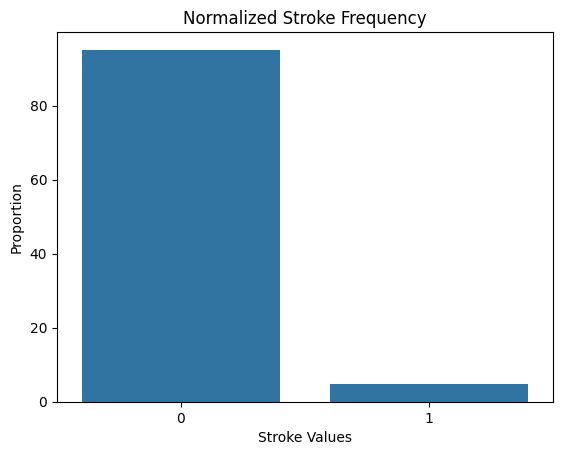

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=normalized_counts.index, y=normalized_counts.values)
plt.title('Normalized Stroke Frequency')
plt.xlabel('Stroke Values')
plt.ylabel('Proportion')
plt.show()

In [ ]:
numerical_features = ["age", "avg_glucose_level", "bmi"]
df[numerical_features].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [ ]:
from sklearn.metrics import mutual_info_score
catrgorical_features = ["gender",	"hypertension",	"heart_disease",	"ever_married",	"work_type",	"Residence_type",	"smoking_status"]
for col in catrgorical_features:
    print(f"{col}: {mutual_info_score(df[col], y):.2f}")

gender: 0.00
hypertension: 0.01
heart_disease: 0.01
ever_married: 0.01
work_type: 0.01
Residence_type: 0.00
smoking_status: 0.00


So categorical variables have a very small dependancey on the stroke

In [ ]:
for col in numerical_features:
    print(f"{col}: {df[col].corr(y):.2f}")

age: 0.25
avg_glucose_level: 0.13
bmi: 0.04


so numerical features have more influence on the stroke
Weak postivite relationship with age and stroke

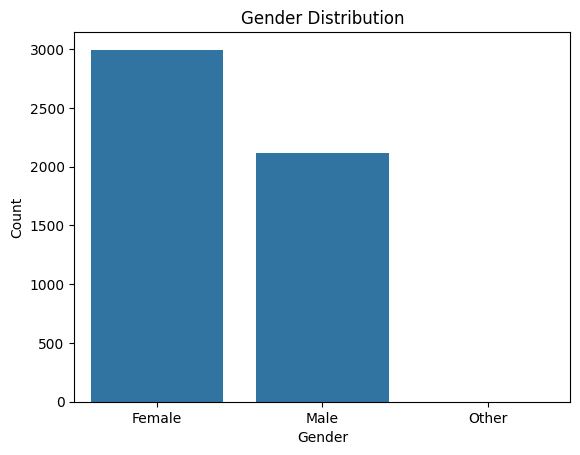

In [ ]:
df['gender'].value_counts()
sns.barplot(x=df['gender'].value_counts().index, y=df['gender'].value_counts().values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
round(df[df['gender']=='Male']['stroke'].mean()*100,2),round(df[df['gender']=='Female']['stroke'].mean()*100,2)

(5.11, 4.71)

SO MALES HAVE A HIGHER CHANCE OF GETTING STROKE

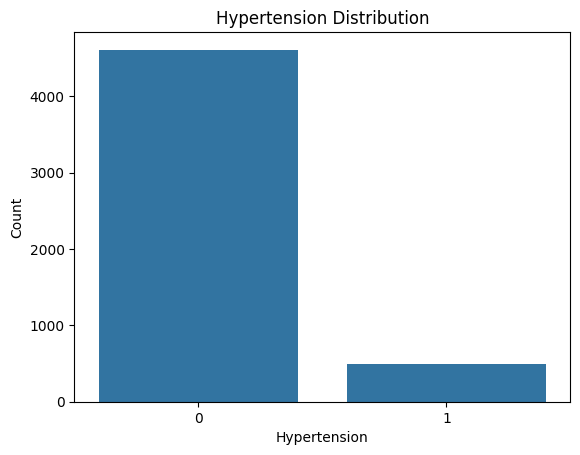

In [ ]:
df['hypertension'].value_counts()
sns.barplot(x=df['hypertension'].value_counts().index, y=df['hypertension'].value_counts().values)
plt.title('Hypertension Distribution')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

In [ ]:
round(df[df['hypertension']==0]['stroke'].mean()*100,2),round(df[df['hypertension']==1]['stroke'].mean()*100,2)

(3.97, 13.25)

SO PEOPLE WITH HYPERTENSION ARE MORE LIKELY TO HAVE STROKE

Text(0, 0.5, 'Count')

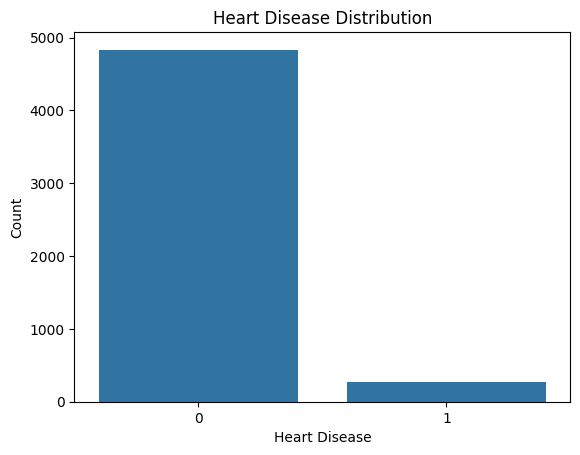

In [ ]:
df['heart_disease'].value_counts()
sns.barplot(x=df['heart_disease'].value_counts().index, y=df['heart_disease'].value_counts().values)
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

In [ ]:
round(df[df['heart_disease']==0]['stroke'].mean()*100,2),round(df[df['heart_disease']==1]['stroke'].mean()*100,2)

(4.18, 17.03)

SO PEOPLE WITH HEART DISEASE ARE MORE LIKELY TO HAVE STROKE

Text(0, 0.5, 'Count')

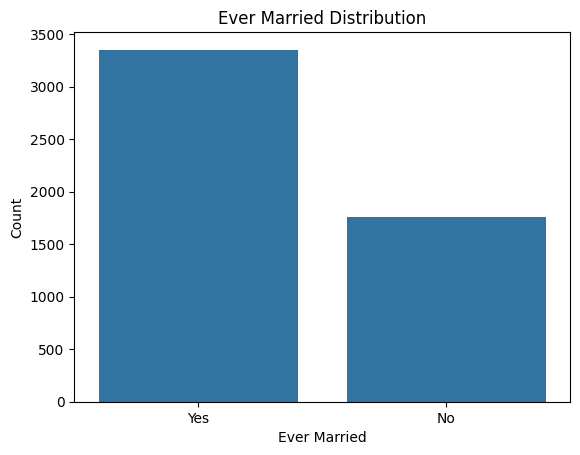

In [ ]:
df['ever_married'].value_counts()
sns.barplot(x=df['ever_married'].value_counts().index, y=df['ever_married'].value_counts().values)
plt.title('Ever Married Distribution')
plt.xlabel('Ever Married')
plt.ylabel('Count')

In [ ]:
round(df[df['ever_married']=='Yes']['stroke'].mean()*100,2),round(df[df['ever_married']=='No']['stroke'].mean()*100,2)

(6.56, 1.65)

SO PEOPLE WHO EVER MARRIED ARE MORE LIKELY TO HAVE STROKE

Text(0, 0.5, 'Count')

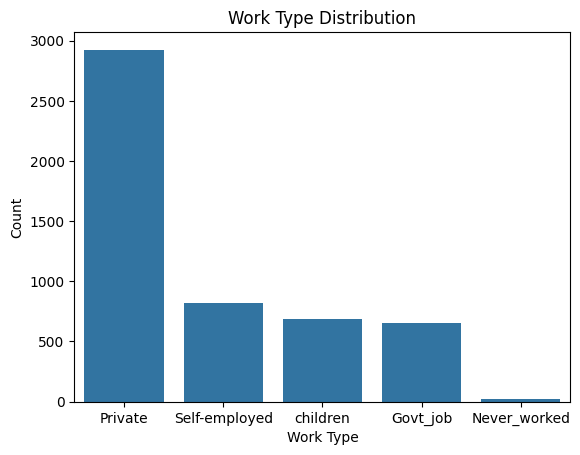

In [ ]:
df['work_type'].value_counts()
sns.barplot(x=df['work_type'].value_counts().index, y=df['work_type'].value_counts().values)
plt.title('Work Type Distribution')
plt.xlabel('Work Type')
plt.ylabel('Count')

In [ ]:

for work_type in df['work_type'].unique():
    print(f"{work_type}: {round(df[df['work_type']==work_type]['stroke'].mean()*100,2)}")

Private: 5.09
Self-employed: 7.94
Govt_job: 5.02
children: 0.29
Never_worked: 0.0


SO SELF EMPLOYED PEOPLE ARE MOST LIKELY TO HAVE A STROKE

Text(0, 0.5, 'Count')

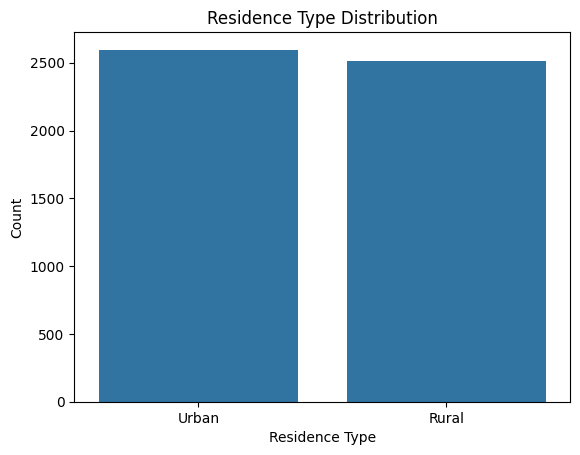

In [ ]:
df['Residence_type'].value_counts()
sns.barplot(x=df['Residence_type'].value_counts().index, y=df['Residence_type'].value_counts().values)
plt.title('Residence Type Distribution')
plt.xlabel('Residence Type')
plt.ylabel('Count')

In [ ]:
round(df[df['Residence_type']=='Urban']['stroke'].mean()*100,2),round(df[df['Residence_type']=='Rural']['stroke'].mean()*100,2)

(5.2, 4.53)

SO PEOPLE WHO LIVE IN URBAN AREAS ARE MORE LIKELY TO GET STROKE

Text(0, 0.5, 'Count')

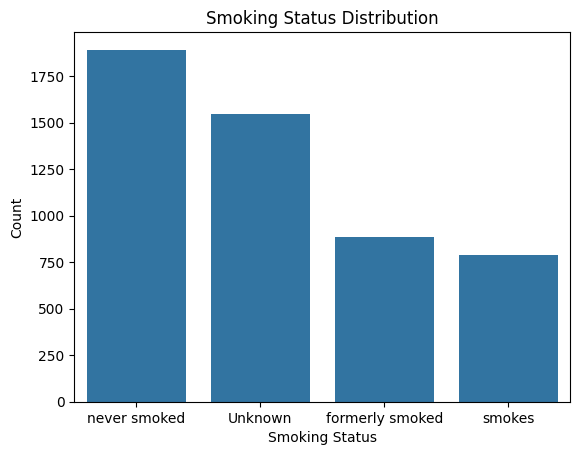

In [ ]:
df['smoking_status'].value_counts()
sns.barplot(x=df['smoking_status'].value_counts().index, y=df['smoking_status'].value_counts().values)
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')

In [ ]:
for smoking_status in df['smoking_status'].unique():
    print(f"{smoking_status}: {round(df[df['smoking_status']==smoking_status]['stroke'].mean()*100,2)}")

formerly smoked: 7.91
never smoked: 4.76
smokes: 5.32
Unknown: 3.04


former smokers are most liekly to get cancer

In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

## TRANSFORMING

In [ ]:
numerical = ["age", "avg_glucose_level", "bmi"]
categorical = ["gender",	"hypertension",	"heart_disease",	"ever_married",	"work_type",	"Residence_type",	"smoking_status"]
# FIRST impute the dataset to fill up null values,
# Second use Power Trandformer to Normalize the skewness and standardize it to fix priority
# THird OneHotEncoding to make Labels
transformer = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                          ('power',PowerTransformer(method='yeo-johnson',standardize = True))
                           ]), numerical),
    ('cat', OneHotEncoder(), categorical)
])
# distributing in equal proprtion/ balancing
pipeline = Pipeline(steps=[('transformer', transformer), ('smote',SMOTE())])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def get_models():
  models,names = list(), list()
  models.append(LogisticRegression())
  names.append('LR')
  models.append(RandomForestClassifier(n_estimators=100))
  names.append('RF')
  models.append(DecisionTreeClassifier())
  names.append('DT')
  models.append(LinearDiscriminantAnalysis())
  names.append('LDA')
  return models, names



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from imblearn.pipeline import Pipeline as IMBPipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import pandas as pd


numerical = ["age", "avg_glucose_level", "bmi"]
categorical = ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status"]

# Define the column transformer
transformer = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('power', PowerTransformer(method='yeo-johnson', standardize=True))
    ]), numerical),
    ('cat', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Use most_frequent for categorical
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # Add OneHotEncoder here
    ]), categorical)
])

# Define the function to get models
def get_models():
    models, names = list(), list()
    models.append(LogisticRegression())
    names.append('LR')
    models.append(RandomForestClassifier(n_estimators=100))
    names.append('RF')
    models.append(DecisionTreeClassifier())
    names.append('DT')
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    return models, names

# Define the function to evaluate models
def evaluate_model(X, y, models):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(models, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    return scores

# Assuming 'df' is your DataFrame
y = df['stroke']
X = df.drop('stroke', axis=1)

# Apply the transformer to the data
X_transformed = transformer.fit_transform(X)

# Get models and evaluate them
models, names = get_models()
results = list()

for i in range(len(models)):
    # Create pipeline with SMOTE and the current model
    pipeline = IMBPipeline(steps=[('smote', SMOTE(sampling_strategy='auto')), ('model', models[i])])

    # Evaluate the pipeline using cross-validation
    scores = evaluate_model(X_transformed, y, pipeline)  # Use transformed data

    results.append(scores)
    if scores.size > 0:
        print(f'{names[i]}: {np.mean(scores)} ({np.std(scores)})')
    else:
        print(f'{names[i]}: No scores')

LR: 0.834099963945998 (0.02859830863509997)
RF: 0.7823363444058554 (0.02886821213969954)
DT: 0.5813509047301163 (0.04204000627164581)
LDA: 0.8364947763947687 (0.029940993076969243)


In [ ]:
# from imblearn.pipeline import Pipeline as IMBPipeline
# y = df['stroke']
# X= df.drop('stroke', axis=1)

# models,names = get_models()
# results = list()
# for i in range(len(models)):
#   pipeline = IMBPipeline(steps=[('transformer', transformer), ('smote',SMOTE(sampling_strategy='auto')),('model',models[i])])
#   scores = evaluate_model(X,y,pipeline)
#   results.append(scores)
#   if scores.size > 0:
#     print(f'{names[i]}: {np.mean(scores)} ({np.std(scores)})')
#   else:
#     print(f'{names[i]}: No scores')

LR: nan (nan)
RF: nan (nan)
DT: nan (nan)
LDA: nan (nan)
